<a href="https://colab.research.google.com/github/allaltune/HCSPD_2024/blob/main/Semana%201/Actividad%20semana%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1 - a.




Se asignan los valores:
  R = 1Ω,
  L = 1H y
  C = 1F

Queda el espacio de estados:

$$ A= \begin{bmatrix}
-1 & -1 \\
1 & 0 \\
\end{bmatrix}  $$

$$ B= \begin{bmatrix}
1  \\
 0 \\
\end{bmatrix}  $$

$$ C^T= \begin{bmatrix}
1 & 0 \\
\end{bmatrix}  $$

Se instala Octave

In [3]:
!apt install octave

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [4]:
!apt-get install -y liboctave-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libegl-dev libfftw3-bin libfftw3-dev libfftw3-quad3 libgl-dev libgl1-mesa-dev libgles-dev
  libgles1 libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev octave-dev
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libegl-dev libfftw3-bin libfftw3-dev libfftw3-quad3 libgl-dev libgl1-mesa-dev libgles-dev
  libgles1 libglvnd-core-dev libglvnd-dev libglx-dev liboctave-dev libopengl-dev octave-dev
0 upgraded, 14 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,450 kB of archives.
After this operation, 26.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libegl-dev 

In [5]:
%%writefile instalacion_pkg.m
pkg install -forge control


Writing instalacion_pkg.m


In [6]:
%%writefile inst_pkg_signal.m
pkg install -forge signal

Writing inst_pkg_signal.m


In [7]:
!octave -W instalacion_pkg.m

slicot/src/TB01ZD.f:272:72: warning: type of ‘mb01pd’ does not match original declaration []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wlto-type-mismatch-Wlto-type-mismatch]8;;]
  272 |       CALL MB01PD( 'S', 'G', N, N, 0, 0, ANORM, 0, NBLK, A, LDA, INFO )
      |                                                                        ^
slicot/src/MB01PD.f:1:23: note: ‘mb01pd’ was previously declared here
    1 |       SUBROUTINE MB01PD( SCUN, TYPE, M, N, KL, KU, ANRM, NBL, NROWS, A,
      |                       ^
slicot/src/MB01PD.f:1:23: note: code may be misoptimized unless ‘-fno-strict-aliasing’ is used
sl_sb10ad.cc:36:9: warning: type of ‘sb10ad_’ does not match original declaration []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wlto-type-mismatch-Wlto-type-mismatch]8;;]
   36 |     int F77_FUNC (sb10ad, SB10AD)
      |         ^
slicot/src/SB10AD.f:1:23: note: return value type mismatch
    1 |       SUBROUTINE SB10AD( JOB, N, M,

In [8]:
!octave -W inst_pkg_signal.m

For information about changes from previous versions of the signal package, run 'news signal'.


Se resuelve en forma analítica mediante Octave:

In [9]:
%%writefile Calculo_RLC_Analitico.m
clear all; clc;
pkg load control
pkg load signal
warning('off','all');


#Defino el espacio de estados
A= [-1, -1; 1, 0];
B= [1; 0];
C= [1;0];
C2= [0;1];
C_transp= C';
C2_transp=C2';
#Planteo el sistema
sys=ss(A,B,C_transp);
[num,den]=ss2tf(sys);

sys2=ss(A,B,C2_transp);
[num2,den2]=ss2tf(sys2);

G=tf(num,den);
G2=tf(num2,den2);

t=0:0.1:3;
u = zeros (length(t) ,1);
i=1;
for t=0:0.1:3
  i=i+1;
  u(i,1)=12;
  endfor
#Grafico y guardo el png
hfig1 = figure(1); set(hfig1, 'Visible', 'off');

subplot(2,1,1); hold on;
lsim(sys,u,t);title('x_1 corriente'); hold on;

subplot(2,1,2); hold on;
lsim(sys2,u,t);title('x_2 Vc_t'); hold on;

print(hfig1,'Vars_temporal','-r300','-dpng');
save('Calculo_RLC_Analitico.mat','-v7');


Writing Calculo_RLC_Analitico.m


In [10]:
!octave -W Calculo_RLC_Analitico.m

ans = -8.2778
ans = -23.804


In [11]:
!octave -W Calculo_RLC_Analitico.m
import scipy.io
mat = scipy.io.loadmat('/content/Calculo_RLC_Analitico.mat')

ans = -8.2778
ans = -23.804


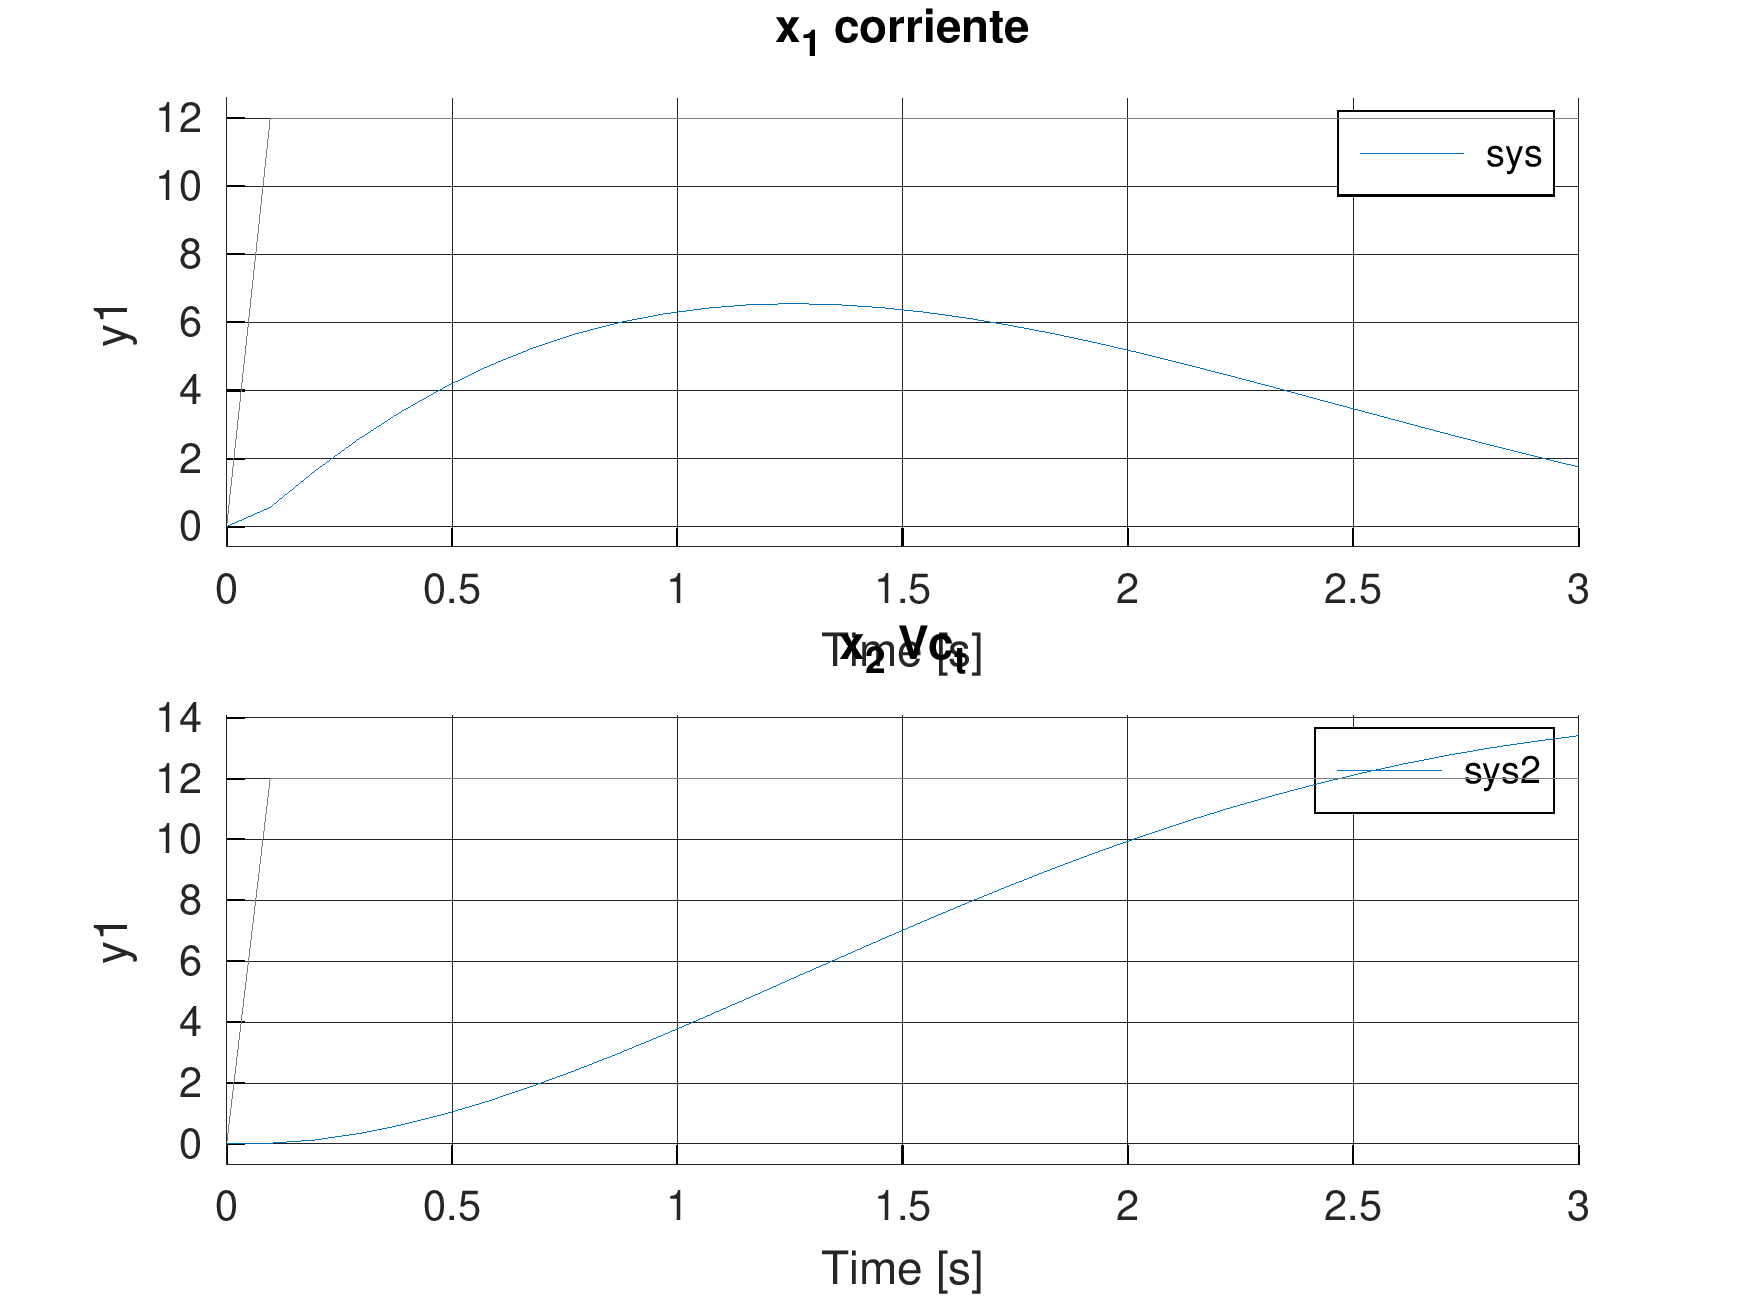

In [12]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

#Actividad 1 - b.

Planteando la solución mediante Euler:

In [59]:
%%writefile Verificacion_Num.m
clc;
clear all;
warning('off','all');

% Defino el espacio de estados
R=1; L=1; C=1;
A=[-R/L, -1/L; 1/C,0];
B=[1/L;0];
C_out=[R 0];

%condicion inicial
X=[0; 0];

%tiempo de etapa
t_etapa=3e-4;

%Tiempo de fin de simulación
tF=3;

u=12;

ii = 0;
for t=0:t_etapa:tF
    ii=ii+1;
    x1(ii)=X(1); % corriente
    x2(ii)=X(2); % tensión en el capacitor
    x=X;
    xp=A*x+B*u;
    x=x+xp*t_etapa;
    X=x;
end

t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');

% Plotting
subplot(2,1,1);hold on;
plot(t, x1, 'r');
title('x_1 corriente');

subplot(2,1,2);;hold on;
plot(t, x2, 'r');
title('x_2 Vc_t');


print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [60]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

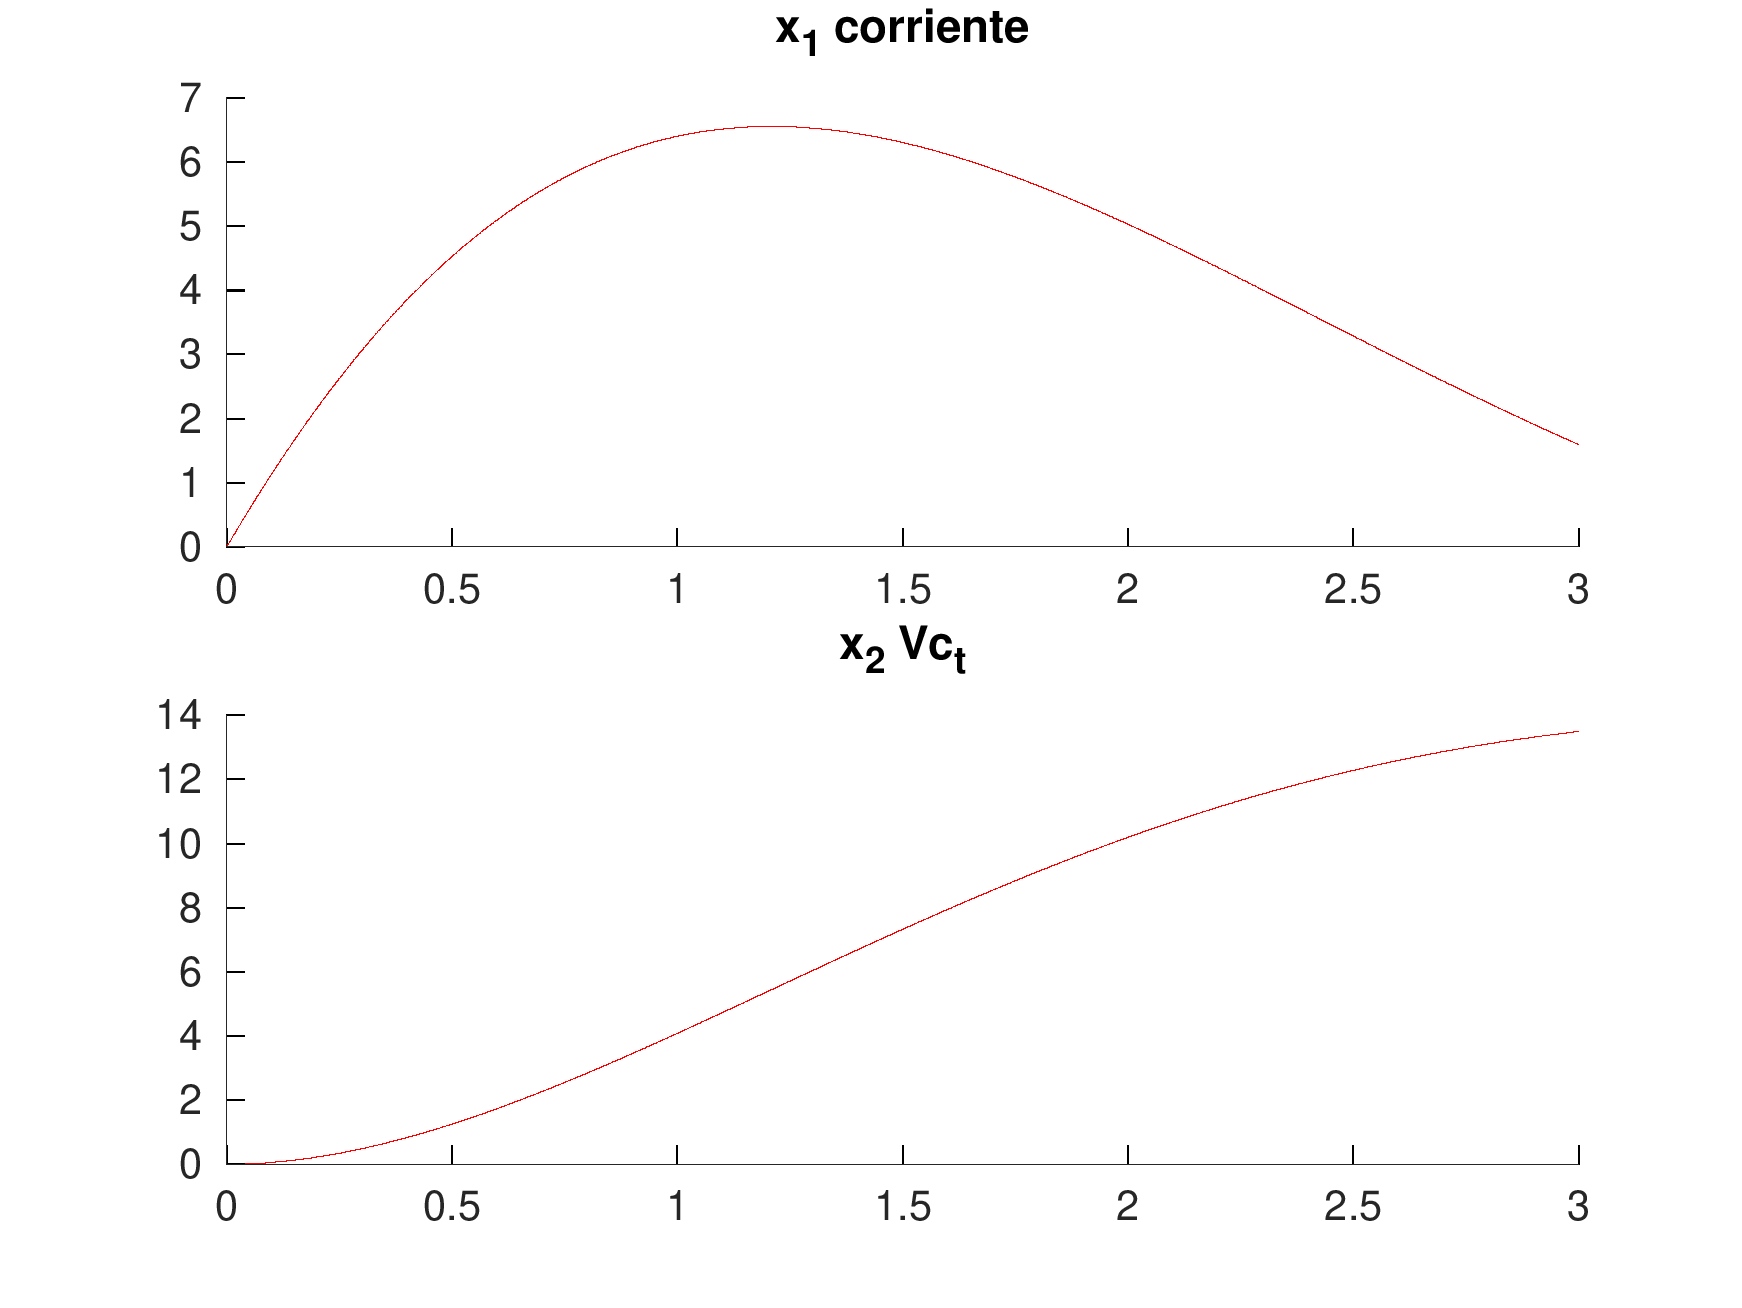

In [61]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

#Actividad 2

Se asignan los valores: R = 2.2kΩ, L = 10μH y C = 100nF.
Planteando la solución mediante Euler:


In [141]:
%%writefile Verificacion_Num.m
clc;
clear all;
warning('off','all');

% Defino el espacio de estados
R=2200; L=10e-6; C=100e-9;
A=[-R/L, -1/L; 1/C,0];
B=[1/L;0];
C_out=[R 0];

%condicion inicial
X=[0; 0];

%tiempo de etapa
t_etapa=0.01E-9;

%Tiempo de fin de simulación
tF=2E-6;

u=12;

ii = 0;
for t=0:t_etapa:tF
    ii=ii+1;
    x1(ii)=X(1); % corriente
    x2(ii)=X(2); % tensión en el capacitor
    x=X;
    xp=A*x+B*u;
    x=x+xp*t_etapa;
    X=x;
end

t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
% Plotting
subplot(2,1,1);hold on;
plot(t, x1, 'r');
title('x_1 corriente');

subplot(2,1,2);;hold on;
plot(t, x2, 'r');
title('x_2 Vc_t');


print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [142]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

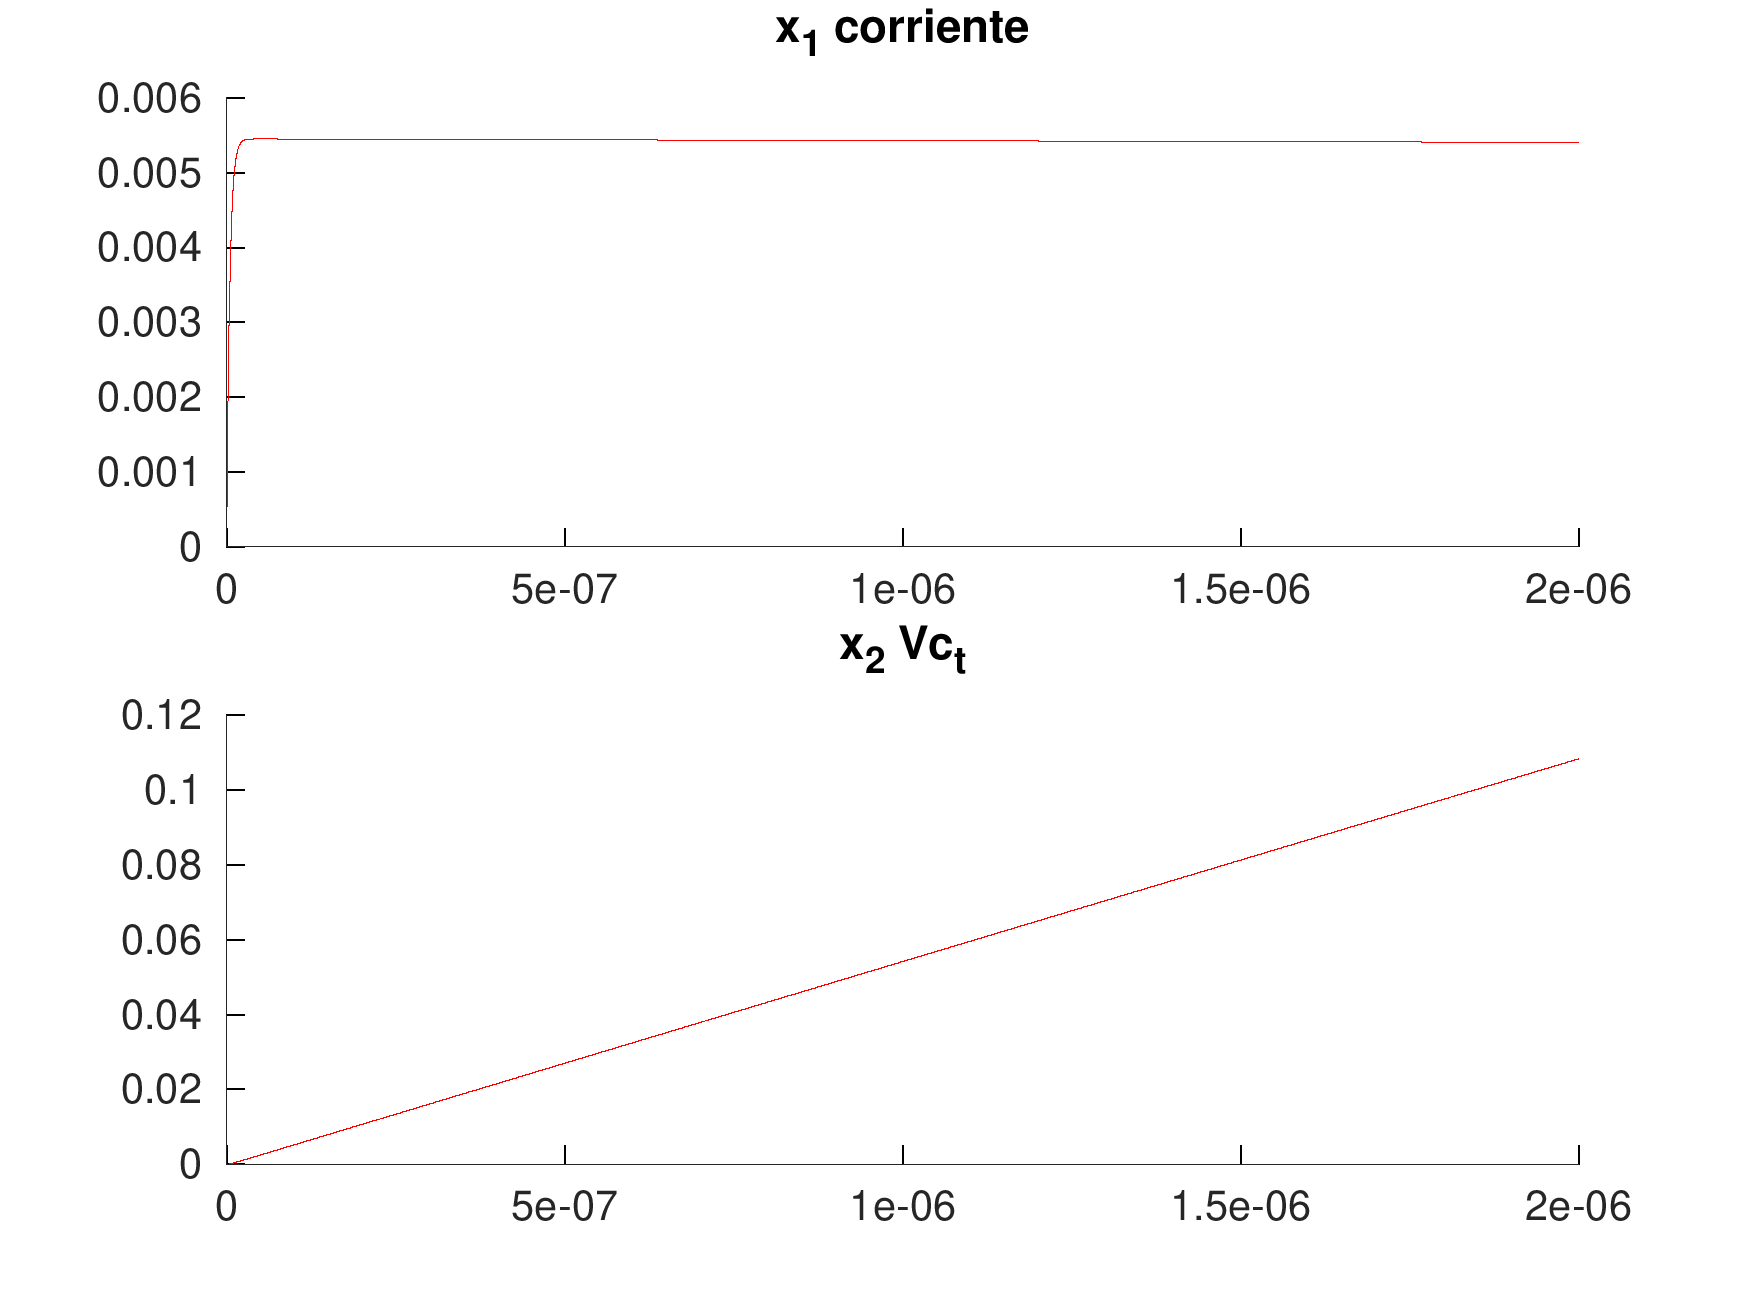

In [143]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

#Actividad 3

Considerando que la entrada cambia de signo cada 1ms

In [144]:
%%writefile Verificacion_Num.m
clc;
clear all;
warning('off','all');

% Defino el espacio de estados
R=2200; L=10e-6; C=100e-9;
A=[-R/L, -1/L; 1/C,0];
B=[1/L;0];
C_out=[R 0];

%condicion inicial
X=[0; 0];

%tiempo de etapa
t_etapa=0.01E-9;;

%Tiempo de fin de simulación
tF=2e-6;

u=12;

ii = 0;
for t=0:t_etapa:1e-6
    ii=ii+1;
    x1(ii)=X(1); % corriente
    x2(ii)=X(2); % tensión en el capacitor
    x=X;
    xp=A*x+B*u;
    x=x+xp*t_etapa;
    X=x;
end

for t=1e-6+t_etapa:t_etapa:tF
    u=-12;
    ii=ii+1;
    x1(ii)=X(1); % corriente
    x2(ii)=X(2); % tensión en el capacitor
    x=X;
    xp=A*x+B*u;
    x=x+xp*t_etapa;
    X=x;
end

t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
% Plotting
subplot(2,1,1);hold on;
plot(t, x1, 'r');
title('x_1 corriente');

subplot(2,1,2);;hold on;
plot(t, x2, 'r');
title('x_2 Vc_t');


print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [145]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

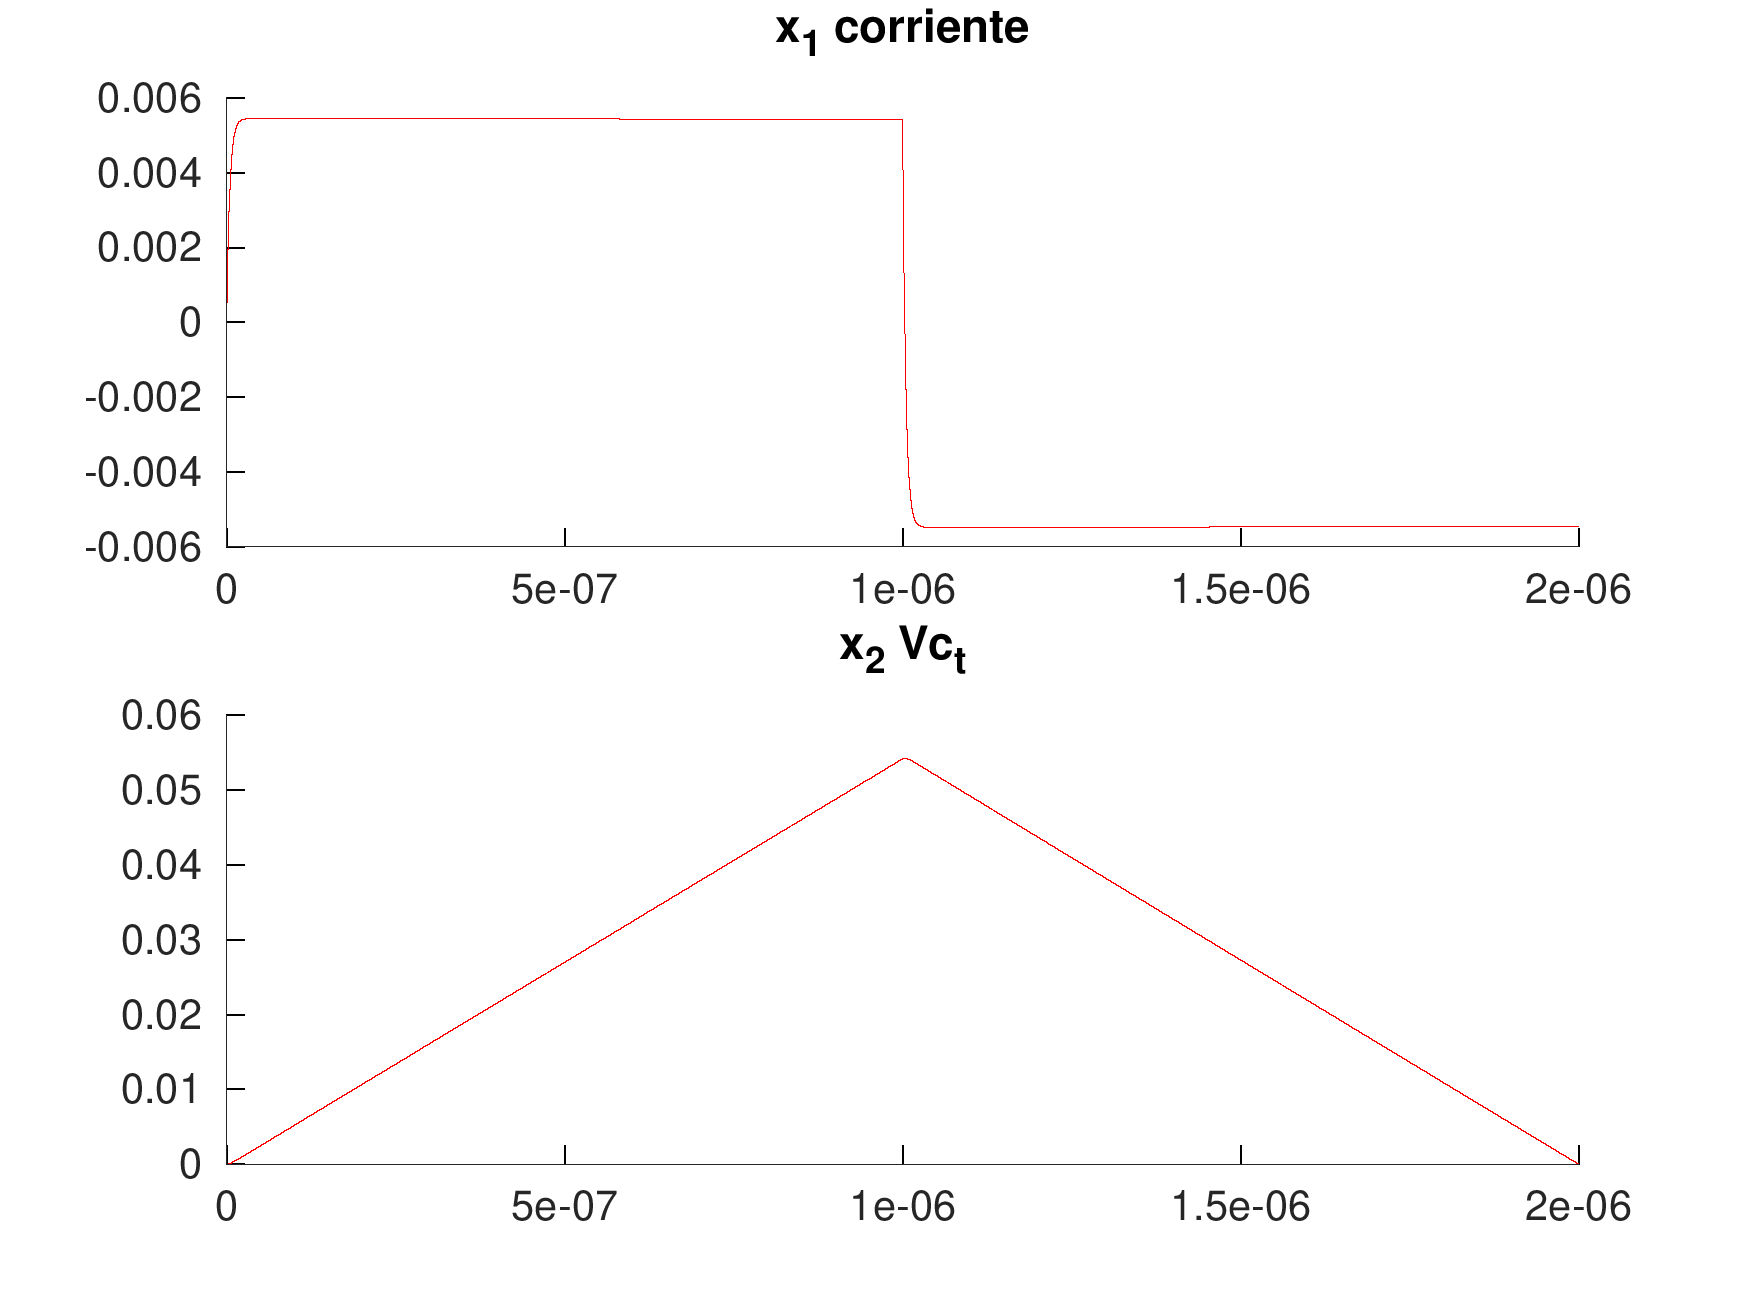

In [146]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt